In [27]:
import pandas as pd
import numpy as np
import collections
import tensorflow as tf

def createNeighbor(df):
    data = []
    for each_line in df.iterrows():
        for header in ["Proto","SrcAddr","Dport"]:
            if header == "SrcAddr":
                data.append([each_line[1][header],each_line[1]["DstAddr"]])
                data.append([each_line[1][header],each_line[1]["Proto"]])
                data.append([each_line[1][header],str(each_line[1]["Dport"])])
            else:
                data.append([str(each_line[1][header]),each_line[1]["DstAddr"]])

    return data

df = pd.read_csv("corpus_example.csv")

word2int={}
sentences = []
wordlist = []
for each_line in df.iterrows():
    sentences.append(each_line[1].tolist())
    for header in ["Proto","SrcAddr","DstAddr","Dport"]:
        wordlist.append(str(each_line[1][header]))

myCounter = collections.Counter(wordlist)
print(myCounter.most_common())
wordlist=set(wordlist)

neighbor = createNeighbor(df)
hi = pd.DataFrame(neighbor, columns = ['input', 'label'])

for i,word in enumerate(wordlist):
    word2int[word] = i

for each in word2int.keys():
    print(each+":"+str(word2int[each]))




[('tcp', 270), ('udp', 220), ('147.32.84.229', 186), ('13363', 88), ('147.32.80.9', 73), ('53', 73), ('80', 70), ('147.32.84.59', 59), ('443', 43), ('147.32.84.118', 41), ('6881', 39), ('147.32.85.25', 39), ('140.115.25.74', 30), ('147.32.84.138', 29), ('147.32.86.165', 25), ('173.242.220.227', 17), ('147.32.84.111', 17), ('188.121.222.1', 12), ('147.32.84.2', 11), ('147.32.3.51', 10), ('10010', 10), ('43087', 8), ('122.174.15.39', 7), ('12114', 7), ('147.32.87.22', 6), ('77.78.99.22', 6), ('147.32.86.24', 6), ('91.207.59.162', 6), ('203.23.120.136', 5), ('147.32.84.46', 4), ('147.32.86.166', 4), ('147.32.85.56', 4), ('147.32.86.223', 4), ('74.125.232.213', 4), ('74.125.232.220', 4), ('88.212.37.169', 3), ('94.44.60.103', 3), ('188.112.125.201', 3), ('212.201.86.130', 3), ('92.40.253.219', 3), ('147.32.80.13', 3), ('147.32.86.110', 3), ('8080', 3), ('213.155.227.215', 3), ('74.125.232.215', 3), ('161', 3), ('123', 3), ('147.32.85.18', 3), ('2.159.127.100', 2), ('85.132.162.9', 2), ('14

In [28]:
df.head(10)

,Proto,SrcAddr,DstAddr,Dport
0,tcp,93.45.239.29,147.32.84.118,6881
1,tcp,62.240.166.118,147.32.84.229,13363
2,tcp,147.32.86.148,66.235.132.232,80
3,tcp,147.32.3.51,147.32.84.46,10010
4,tcp,88.212.37.169,147.32.84.118,6881
5,tcp,94.44.60.103,147.32.84.118,6881
6,tcp,2.159.127.100,147.32.84.118,6881
7,tcp,213.233.154.219,147.32.84.229,13363
8,tcp,88.212.37.169,147.32.84.118,6881
9,tcp,95.210.161.212,147.32.84.118,6881


In [29]:
hi.head(10)

,input,label
0,tcp,147.32.84.118
1,93.45.239.29,147.32.84.118
2,93.45.239.29,tcp
3,93.45.239.29,6881
4,6881,147.32.84.118
5,tcp,147.32.84.229
6,62.240.166.118,147.32.84.229
7,62.240.166.118,tcp
8,62.240.166.118,13363
9,13363,147.32.84.229


In [30]:
ONE_HOT_DIM = len(wordlist)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(hi['input'], hi['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 100

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [33]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 2000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 1 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  29.304575
iteration 1 loss is :  28.655039
iteration 2 loss is :  28.348558
iteration 3 loss is :  28.032267
iteration 4 loss is :  27.783314
iteration 5 loss is :  27.535303
iteration 6 loss is :  27.384508
iteration 7 loss is :  27.198217
iteration 8 loss is :  27.222286
iteration 9 loss is :  27.014547
iteration 10 loss is :  27.137928
iteration 11 loss is :  26.814697
iteration 12 loss is :  26.93451
iteration 13 loss is :  26.53341
iteration 14 loss is :  26.618729
iteration 15 loss is :  26.21677
iteration 16 loss is :  26.248806
iteration 17 loss is :  25.896444
iteration 18 loss is :  25.892992
iteration 19 loss is :  25.595936
iteration 20 loss is :  25.58899
iteration 21 loss is :  25.330856
iteration 22 loss is :  25.343502
iteration 23 loss is :  25.10374
iteration 24 loss is :  25.147343
iteration 25 loss is :  24.906683
iteration 26 loss is :  24.982069
iteration 27 loss is :  24.725573
iteration 28 loss is :  24.823338
iteration 29 loss is :  24.54

iteration 239 loss is :  15.320094
iteration 240 loss is :  15.32864
iteration 241 loss is :  15.299979
iteration 242 loss is :  15.304809
iteration 243 loss is :  15.271204
iteration 244 loss is :  15.271186
iteration 245 loss is :  15.23339
iteration 246 loss is :  15.228471
iteration 247 loss is :  15.188103
iteration 248 loss is :  15.179175
iteration 249 loss is :  15.138198
iteration 250 loss is :  15.12668
iteration 251 loss is :  15.08688
iteration 252 loss is :  15.074278
iteration 253 loss is :  15.036932
iteration 254 loss is :  15.024534
iteration 255 loss is :  14.990325
iteration 256 loss is :  14.978995
iteration 257 loss is :  14.948099
iteration 258 loss is :  14.938421
iteration 259 loss is :  14.910652
iteration 260 loss is :  14.903017
iteration 261 loss is :  14.878063
iteration 262 loss is :  14.872705
iteration 263 loss is :  14.850198
iteration 264 loss is :  14.847293
iteration 265 loss is :  14.826789
iteration 266 loss is :  14.826409
iteration 267 loss is : 

iteration 474 loss is :  12.506328
iteration 475 loss is :  12.538346
iteration 476 loss is :  12.488459
iteration 477 loss is :  12.520744
iteration 478 loss is :  12.470616
iteration 479 loss is :  12.503181
iteration 480 loss is :  12.452816
iteration 481 loss is :  12.485646
iteration 482 loss is :  12.435057
iteration 483 loss is :  12.468174
iteration 484 loss is :  12.417347
iteration 485 loss is :  12.4507475
iteration 486 loss is :  12.399701
iteration 487 loss is :  12.433412
iteration 488 loss is :  12.382109
iteration 489 loss is :  12.416142
iteration 490 loss is :  12.364581
iteration 491 loss is :  12.398951
iteration 492 loss is :  12.347124
iteration 493 loss is :  12.381856
iteration 494 loss is :  12.329747
iteration 495 loss is :  12.364852
iteration 496 loss is :  12.312433
iteration 497 loss is :  12.3479185
iteration 498 loss is :  12.29519
iteration 499 loss is :  12.331086
iteration 500 loss is :  12.278007
iteration 501 loss is :  12.31432
iteration 502 loss i

iteration 709 loss is :  10.825663
iteration 710 loss is :  10.723441
iteration 711 loss is :  10.813154
iteration 712 loss is :  10.710831
iteration 713 loss is :  10.800636
iteration 714 loss is :  10.698235
iteration 715 loss is :  10.788153
iteration 716 loss is :  10.685676
iteration 717 loss is :  10.77569
iteration 718 loss is :  10.673147
iteration 719 loss is :  10.763274
iteration 720 loss is :  10.660645
iteration 721 loss is :  10.7508545
iteration 722 loss is :  10.648172
iteration 723 loss is :  10.738459
iteration 724 loss is :  10.635724
iteration 725 loss is :  10.726098
iteration 726 loss is :  10.623308
iteration 727 loss is :  10.713757
iteration 728 loss is :  10.610916
iteration 729 loss is :  10.701427
iteration 730 loss is :  10.598539
iteration 731 loss is :  10.689136
iteration 732 loss is :  10.586207
iteration 733 loss is :  10.676859
iteration 734 loss is :  10.573913
iteration 735 loss is :  10.66463
iteration 736 loss is :  10.561638
iteration 737 loss is

iteration 947 loss is :  9.567426
iteration 948 loss is :  9.457667
iteration 949 loss is :  9.558563
iteration 950 loss is :  9.448823
iteration 951 loss is :  9.549722
iteration 952 loss is :  9.439986
iteration 953 loss is :  9.540891
iteration 954 loss is :  9.431157
iteration 955 loss is :  9.532077
iteration 956 loss is :  9.42236
iteration 957 loss is :  9.52328
iteration 958 loss is :  9.4135685
iteration 959 loss is :  9.514481
iteration 960 loss is :  9.40479
iteration 961 loss is :  9.505697
iteration 962 loss is :  9.396035
iteration 963 loss is :  9.496924
iteration 964 loss is :  9.387299
iteration 965 loss is :  9.488179
iteration 966 loss is :  9.378574
iteration 967 loss is :  9.479438
iteration 968 loss is :  9.369868
iteration 969 loss is :  9.470711
iteration 970 loss is :  9.361175
iteration 971 loss is :  9.461995
iteration 972 loss is :  9.352508
iteration 973 loss is :  9.453308
iteration 974 loss is :  9.343851
iteration 975 loss is :  9.444625
iteration 976 lo

iteration 1183 loss is :  8.62077
iteration 1184 loss is :  8.521154
iteration 1185 loss is :  8.613577
iteration 1186 loss is :  8.514048
iteration 1187 loss is :  8.606395
iteration 1188 loss is :  8.506949
iteration 1189 loss is :  8.599227
iteration 1190 loss is :  8.499858
iteration 1191 loss is :  8.592072
iteration 1192 loss is :  8.492775
iteration 1193 loss is :  8.584917
iteration 1194 loss is :  8.485719
iteration 1195 loss is :  8.577797
iteration 1196 loss is :  8.478667
iteration 1197 loss is :  8.570688
iteration 1198 loss is :  8.471618
iteration 1199 loss is :  8.563575
iteration 1200 loss is :  8.464594
iteration 1201 loss is :  8.556475
iteration 1202 loss is :  8.457562
iteration 1203 loss is :  8.549389
iteration 1204 loss is :  8.450556
iteration 1205 loss is :  8.54231
iteration 1206 loss is :  8.443547
iteration 1207 loss is :  8.535235
iteration 1208 loss is :  8.436561
iteration 1209 loss is :  8.52818
iteration 1210 loss is :  8.429579
iteration 1211 loss is 

iteration 1417 loss is :  7.851329
iteration 1418 loss is :  7.757306
iteration 1419 loss is :  7.8453593
iteration 1420 loss is :  7.7513194
iteration 1421 loss is :  7.839388
iteration 1422 loss is :  7.745334
iteration 1423 loss is :  7.8334336
iteration 1424 loss is :  7.7393584
iteration 1425 loss is :  7.827481
iteration 1426 loss is :  7.733385
iteration 1427 loss is :  7.8215322
iteration 1428 loss is :  7.7274213
iteration 1429 loss is :  7.8155937
iteration 1430 loss is :  7.721474
iteration 1431 loss is :  7.8096614
iteration 1432 loss is :  7.7155204
iteration 1433 loss is :  7.8037453
iteration 1434 loss is :  7.7095823
iteration 1435 loss is :  7.797843
iteration 1436 loss is :  7.7036567
iteration 1437 loss is :  7.7919354
iteration 1438 loss is :  7.6977353
iteration 1439 loss is :  7.7860475
iteration 1440 loss is :  7.691824
iteration 1441 loss is :  7.7801666
iteration 1442 loss is :  7.6859193
iteration 1443 loss is :  7.774279
iteration 1444 loss is :  7.6800117
it

iteration 1648 loss is :  7.1182914
iteration 1649 loss is :  7.208935
iteration 1650 loss is :  7.113188
iteration 1651 loss is :  7.203838
iteration 1652 loss is :  7.108091
iteration 1653 loss is :  7.1987486
iteration 1654 loss is :  7.1030006
iteration 1655 loss is :  7.193669
iteration 1656 loss is :  7.097922
iteration 1657 loss is :  7.188582
iteration 1658 loss is :  7.092842
iteration 1659 loss is :  7.1835003
iteration 1660 loss is :  7.087772
iteration 1661 loss is :  7.178438
iteration 1662 loss is :  7.0827065
iteration 1663 loss is :  7.1733723
iteration 1664 loss is :  7.0776505
iteration 1665 loss is :  7.1683245
iteration 1666 loss is :  7.0726037
iteration 1667 loss is :  7.163278
iteration 1668 loss is :  7.067563
iteration 1669 loss is :  7.1582446
iteration 1670 loss is :  7.0625377
iteration 1671 loss is :  7.1532245
iteration 1672 loss is :  7.0575233
iteration 1673 loss is :  7.148207
iteration 1674 loss is :  7.0525103
iteration 1675 loss is :  7.1431937
itera

iteration 1880 loss is :  6.5719013
iteration 1881 loss is :  6.6615252
iteration 1882 loss is :  6.5675445
iteration 1883 loss is :  6.6571383
iteration 1884 loss is :  6.5632014
iteration 1885 loss is :  6.652765
iteration 1886 loss is :  6.5588584
iteration 1887 loss is :  6.6483927
iteration 1888 loss is :  6.554521
iteration 1889 loss is :  6.644036
iteration 1890 loss is :  6.5501876
iteration 1891 loss is :  6.6396704
iteration 1892 loss is :  6.5458646
iteration 1893 loss is :  6.6353207
iteration 1894 loss is :  6.5415416
iteration 1895 loss is :  6.630975
iteration 1896 loss is :  6.5372267
iteration 1897 loss is :  6.6266313
iteration 1898 loss is :  6.5329127
iteration 1899 loss is :  6.6222944
iteration 1900 loss is :  6.5286202
iteration 1901 loss is :  6.6179633
iteration 1902 loss is :  6.524312
iteration 1903 loss is :  6.6136265
iteration 1904 loss is :  6.5200157
iteration 1905 loss is :  6.6092997
iteration 1906 loss is :  6.515723
iteration 1907 loss is :  6.604986

In [34]:
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.89733064  1.0383393   1.1688597  ...  1.0693254   1.8568859
   1.8416849 ]
 [-0.07568914  0.664055    0.06989011 ...  0.51823044  0.9393954
   1.8250397 ]
 [ 0.48122534  1.7978618   0.638515   ...  0.50912267  1.1181664
  -0.09690058]
 ...
 [ 0.58073765  1.283427    0.7367363  ...  0.6531396  -1.8552003
   0.338383  ]
 [ 0.10226744  0.6122617   0.7714836  ...  0.68438077  2.1411216
   2.161071  ]
 [-2.0029154   0.85830253  0.91746557 ...  0.5920444   1.2439437
  -0.35756665]]


In [42]:
w2v_df = pd.DataFrame(vectors, columns = ["x"+str(i) for i in range(1,101) ])
w2v_df['word'] = wordlist
head_list = ["x"+str(i) for i in range(1,101)]
w2v_df = w2v_df[['word']+head_list]
w2v_df

,word,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,147.32.84.21,-0.897331,1.038339,1.168860,0.548789,0.827424,1.350281,0.357317,0.151798,-1.203985,...,-1.574610,-0.374309,-1.090475,-0.190525,2.256838,-0.995346,0.318381,1.069325,1.856886,1.841685
1,2759,-0.075689,0.664055,0.069890,0.113492,2.075718,1.165797,0.159236,0.656618,0.875231,...,1.370241,-0.426580,-1.050216,-0.632900,-0.132972,1.833304,-0.565339,0.518230,0.939395,1.825040
2,203.125.50.50,0.481225,1.797862,0.638515,2.243348,2.395608,-0.890352,2.302247,1.510286,0.544332,...,-0.913163,0.649294,0.177525,1.998903,1.194582,1.538517,0.798135,0.509123,1.118166,-0.096901
3,46.158.48.2,1.809672,1.160131,1.087142,2.002876,-0.088767,1.478506,0.157406,0.930297,1.370391,...,-0.043075,1.327622,2.011404,-0.581754,0.221714,2.069015,-0.875224,0.027485,0.830814,1.676701
4,74.125.232.214,1.315566,1.503721,2.319758,-1.417383,1.881753,2.782334,0.656875,2.596758,-1.372827,...,0.614940,2.182342,2.397736,2.521049,1.555292,-0.858441,1.286282,1.166821,2.559523,0.647945
5,76.13.114.90,0.884432,1.402307,0.236475,2.755326,0.007849,0.771038,1.154081,0.976132,-0.735547,...,1.582394,0.975448,-0.361619,1.121443,0.167561,-0.635591,2.206366,-1.205090,1.419789,0.983787
6,51572,0.514282,0.252563,0.499660,-1.839670,0.198935,0.511351,-0.475192,0.597154,0.617414,...,1.126984,-0.027641,-0.332207,-0.307638,-0.472292,1.690702,0.915639,1.314826,0.630894,0.845138
7,86.161.84.198,1.797912,0.926325,0.284184,0.353122,-1.392520,0.440905,-0.164116,0.122449,0.317926,...,-0.295164,3.241334,0.917003,1.322532,0.547080,2.294626,1.474384,3.063208,-0.506767,0.645493
8,178.4.36.49,0.069732,0.804143,-0.327944,3.628991,0.595381,0.449587,1.073174,1.300431,0.638524,...,0.760437,1.112388,0.236854,0.439323,-0.180617,1.338692,-0.215818,0.643084,-0.074870,0.236419
9,52316,1.228511,0.638138,1.316916,0.701257,-0.010153,1.492005,0.559310,-0.244314,0.325908,...,2.468081,0.408820,1.113907,-0.232438,0.813623,0.449509,-0.330448,0.034572,0.109383,2.235850


[  74.76884 -451.4918 ]
[  35.09708 -367.3498 ]
[-129.68605 -312.05222]
[95.13056  -8.323978]
[-157.8267  270.0755]
[ 95.56532 160.12128]
[-320.71838    -8.932512]
[-195.17259     -6.8093147]
[ 87.014496 186.62857 ]
[ 34.604824 240.27507 ]
[185.04834 182.55054]
[ -5.844442 268.34055 ]
[142.39273  76.39634]
[429.8281   97.70992]
[-90.11668    3.103189]
[122.03537 136.85425]
[-44.358692 321.77667 ]
[-279.01566 -317.61884]
[24.103407 59.131786]
[  29.285057 -419.70032 ]
[-430.32703     9.157623]
[  63.710934 -314.6968  ]
[-97.784096 185.29616 ]
[ -18.352783 -224.38705 ]
[ 162.38173 -126.72485]
[-118.18076   -63.282314]
[45.803596 51.286064]
[-284.48553  -78.71149]
[ 257.8976  -110.71007]
[-59.14961 208.3205 ]
[-178.53412 -309.22687]
[-15.936785 -37.50085 ]
[ 116.05604 -217.71886]
[-210.04333  248.28825]
[-236.8781  -130.28705]
[-158.97853    37.262886]
[-414.05792    85.284935]
[-65.13633  -63.522514]
[ 305.93878 -273.11337]
[  30.53971 -347.1384 ]
[-22.29514 199.23158]
[149.2148  167.518

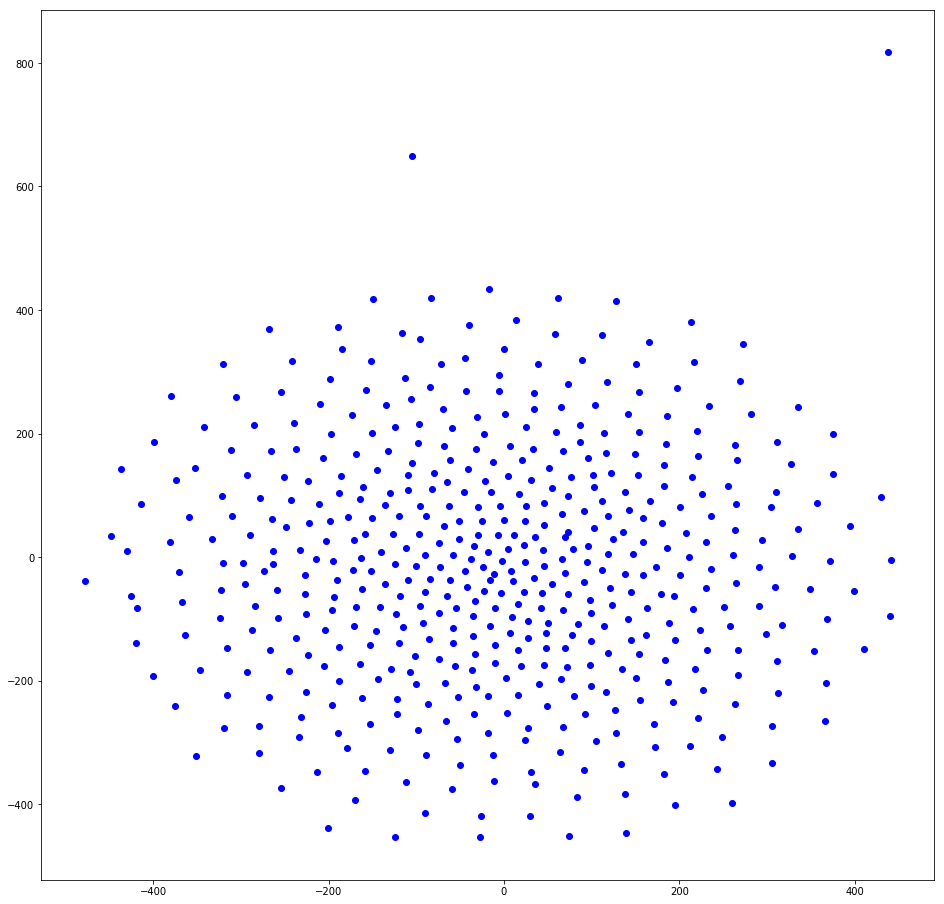

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

"Creates and TSNE model and plots it"
labels = []
tokens = []

    
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(vectors)

x = []
y = []
for value in new_values:
    print(value)
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],marker='o',c='blue')

plt.show()